<a href="https://colab.research.google.com/github/WuilderOsio1198/Senalesysistemas/blob/main/Parcial_1/ResolucionParcial_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<div align="center">

<p><b>PARCIAL 1: SEÑALES Y SISTEMAS 2025-II</p>

<p><b>Profesor:</b> Andrés Marino Álvarez Meza, Ph.D.</p>
<p><b>Estudiante:</b>Wuilder Joafran Osio Tandioy</p>
<p><b>Departamento de Ingeniería Eléctrica, Electrónica y Computación</p>
<p><b>Universidad Nacional de Colombia - Sede Manizales </p>

</di>



In [ ]:
import numpy as np
import sympy as sp
import matplotlib.pyplot as plt

#Punto 1
La *distancia media* entre dos señales periódicas \(x_1(t)\) y \(x_2(t)\), reales o complejas, se puede expresar a partir de la *potencia media* de la diferencia entre ellas:

$$
d^2(x_1, x_2) = \overline{P}{x_1 - x_2} = \lim{T \to \infty} \frac{1}{T} \int_T |x_1(t) - x_2(t)|^2 \, dt
$$

Sean dos señales definidas como:

$$
x_1(t) = A e^{-j n \omega_0 t}
$$

$$
x_2(t) = B e^{j m \omega_0 t}
$$

donde:

$$
\omega_0 = \frac{2\pi}{T}, \quad T, A, B \in \mathbb{R}^+, \quad n, m \in \mathbb{Z}.$$

*Determine la distancia entre las dos señales.*

*Compruebe sus resultados con Python.*


In [ ]:
''' Definicion de variables '''
t = sp.symbols('t', real=True)  # Tiempo [s]

#parametros de las señales
A , B = sp.symbols('A B' , real = True, positive = True)  # Amplitud
T = sp.symbols('T' , real = True , positive = True )  # Periodo [s]
n,m = sp.symbols('n m' , interger= True)  # multiplos enteros de la frecuencia
wo = 2 * sp.pi / T  # Frecuencia angular [rad/s]

'''Definicion de las señales'''
x1 = A * sp.exp(-sp.I * n * wo * t)   # señal 1, x1(t)
x2 = B * sp.exp(sp.I* m * wo * t)   # señal 2, x2 (t)

'''Distancia media'''
# aplicamos la formula con las señales
d = sp.sqrt(sp.limit((1/T)* sp.integrate(sp.Abs(x1 - x2)**2, (t, 0 , T)), T,sp.oo))
d

# Punto 2
Encuentre la señal en tiempo discreto al utilizar un conversor análogo digital con frecuencia de muestreo de 5 kHz y 4 bits de capacidad de representación, aplicado a la señal continua:

x(t) = 3 cos(1000πt) + 5 sin(3000πt) + 10 cos(11000πt)

Realizar la simulación del proceso de discretización (incluyendo al menos tres periodos de x(t)). En caso de que la discretización no sea apropiada, diseñe e implemente un conversor adecuado para la señal estudiada.


In [ ]:
fs = 5000                # frecuencia de muestreo
ts = 1/5000              # periodo de muestreo

'''capacidad de representacion de grafica'''
bits = 4                 # numero de bits
levelsbits = 2**bits     # nieveles o cajones para la cuantizacion de bits


fo = 1000                 #frecuencia de la señal mas pequeña
to = 1/fo                 #periodo de la señal
pd = 3 * to               #periodo de simulacion
t = np.linspace(0 , pd , 10000)  #Valores de muestreo en tiempo continuo
tn = np.arange(0 , pd , ts)      # valores de muestreo en tiempo discreto

''' definimos la señal '''
y = 3 * np.cos(1000 * np.pi * t) + 5 * np.sin(3000 * np.pi * t) + 10 * np.cos(11000 * np.pi * t)      # señal x(t)

'''digitalizamos'''
xn = 3 * np.cos(1000 * np.pi * tn) + 5 * np.sin(3000 * np.pi * tn) + 10 * np.cos(11000 * np.pi * tn)     # señal discreta

'''cuantizacion'''
niveles = np.linspace(min(y),max(y),levelsbits)     #vector de niveles de cuantizacion
dis = np.abs(xn[:,None] - niveles[None, :])         #matriz de distancias entre muestras y niveles
ind = np.argmin(dis, axis=1)                        # indices de los niveles mas cercanos

'''señal digitalizada'''
xdig = niveles[ind]

''' gráfica '''
plt.figure(figsize=(10,6))
plt.plot(t, y, label='$x(t)$', color='C0', linewidth=2)
plt.stem(tn, xn, label='$x[n]$', linefmt='C2-', markerfmt='C2o', basefmt=" ")
plt.plot(tn, xdig, label='$x_{dig}[n]$', color='C3', marker='s', linestyle='-', linewidth=1)

# Líneas de niveles de cuantización
for lv in niveles:
    plt.axhline(lv, color='green', linewidth=1, linestyle='--')   #se dibujan los niveles de cuantizacion con rectas

plt.title('Digitalización de $x(t)$ con $f_s = {}$ Hz y {} bits'.format(fs, bits))
plt.xlabel('Tiempo [s]')
plt.ylabel('Amplitud [V]')
plt.grid()
plt.legend(loc='upper right')
plt.show()

### Verificación del criterio de Nyquist

Ahora se realiza el ejercicio donde, si se cumple el **criterio de Nyquist**, la frecuencia de muestreo debe ser **mayor o igual al doble de la frecuencia de la señal más grande**:

$$
f_s \geq 2 f_{max}
$$

En la **primera parte** del ejercicio, se tiene:

$$
f_s = 5000 \text{ Hz}
$$

$$
f_{max1} = 5500 \text{ Hz}, \quad f_{max2} = 11000 \text{ Hz}
$$

Entonces:

$$
5000 \geq 2(5500) \Rightarrow 5000 \geq 11000
$$

En este caso **no se cumple** completamente el criterio de Nyquist, ya que la frecuencia de muestreo es **menor** al doble de la frecuencia máxima.



Ahora, en el **segundo caso**, la frecuencia de muestreo será:

$$
f_s = 25000 \text{ Hz}
$$

Por tanto:

$$
25000 \geq 2(5500) \Rightarrow 25000 \geq 11000
$$


En este caso, **sí se cumple el criterio de Nyquist**, ya que la frecuencia de muestreo es **mayor o igual** que el doble de la frecuencia máxima de la señal.



In [ ]:
fs = 25000               # frecuencia de muestreo
ts = 1/fs                # periodo de muestreo

'''capacidad de representacion de grafica'''
bits = 4                 # numero de bits
levelsbits = 2**bits     # nieveles o cajones para la cuantizacion de bits


fo = 1000               #frecuencia de la señal
to = 1/fo                #periodo de la señal
pd = 3 * to              #periodo de simulacion
t = np.linspace(0 , pd , 10000)  #Valores de muestreo en tiempo continuo
tn = np.arange(0 , pd , ts) # valores de muestreo en tiempo discreto

''' definimos la señal '''
y = 3 * np.cos(1000 * np.pi * t) + 5 * np.sin(3000 * np.pi * t) + 10 * np.cos(11000 * np.pi * t)      # señal x(t)

'''digitalizamos'''
xn = 3 * np.cos(1000 * np.pi * tn) + 5 * np.sin(3000 * np.pi * tn) + 10 * np.cos(11000 * np.pi * tn)     # señal discreta

'''cuantizacion'''
niveles = np.linspace(min(y),max(y),levelsbits)     #vector de niveles de cuantizacion
dis = np.abs(xn[:,None] - niveles[None, :])       #matriz de distancias entre muestras y niveles
ind = np.argmin(dis, axis=1)                    # indices de los niveles mas cercanos

'''señal digitalizada'''
xdig = niveles[ind]

''' gráfica '''
plt.figure(figsize=(10,6))
plt.plot(t, y, label='$x(t)$', color='C0', linewidth=2)
plt.stem(tn, xn, label='$x[n]$', linefmt='C2-', markerfmt='C2o', basefmt=" ")
plt.plot(tn, xdig, label='$x_{dig}[n]$', color='C3', marker='s', linestyle='-', linewidth=1)

# Líneas de niveles de cuantización
for lv in niveles:
    plt.axhline(lv, color='green', linewidth=1, linestyle='--')     #se dibujan los niveles de cuantizacion con rectas


plt.title('Digitalización de $x(t)$ con $f_s = {}$ Hz y {} bits'.format(fs, bits))
plt.xlabel('Tiempo [s]')
plt.ylabel('Amplitud [V]')
plt.grid()
plt.legend(loc='upper right')
plt.show()

###  Punto 4
Encuentre el espectro de Fourier, su parte real, imaginaria, magnitud, fase y el error relativo para $n \in \{0, \pm1, \pm2, \pm3, \pm4, \pm5\}$, a partir de $x''(t)$ para la señal $x(t)$ en la Figura 1. Compruebe el espectro obtenido con la estimación a partir de $x(t)$. Presente las simulaciones de Python respectivas.


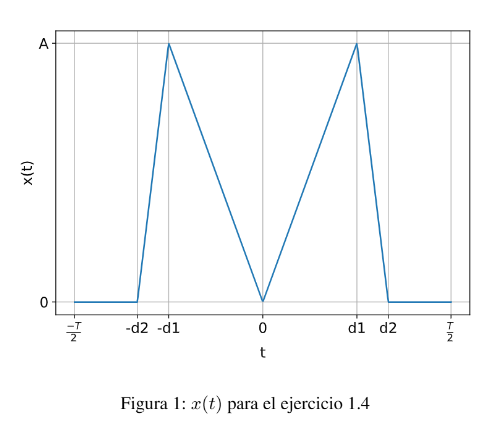